# Tight Binding Moiré Hamiltonian Construction

The **tight-binding Hamiltonian**  [@ashcroft1976] is a widely used model in solid-state physics and quantum chemistry to describe the electronic structure of solids — especially in crystals and layered materials. In this model, electrons are considered *localized* around atomic sites but can *hop* to neighbouring atoms. To describe such a Hamiltonian for a **Moiré system**, we use the second quantized [@bruus2004] form:

$$
H = \sum_{\alpha, \beta;\, r,r' \in L} t^1_{rr', \alpha\beta}c^{\dagger}_{r,\beta}c_{r',\alpha} 
+ \sum_{\alpha, \beta;\, r,r' \in U} t^2_{rr', \alpha\beta}d^{\dagger}_{r,\beta}d_{r',\alpha} 
+ \sum_{\alpha, \beta;\, r,r'} t^{\perp}_{rr', \alpha\beta}c^{\dagger}_{r,\beta}d_{r',\alpha} + \text{h.c.}
$$

Here, $c^{\dagger}_{r,\beta}$ and $c_{r',\alpha}$ denote the electron creation and annihilation operators at lattice sites $r$ and $r'$ in the **lower layer** ($L$), associated with orbitals $\beta$ and $\alpha$, respectively. Likewise, $d^{\dagger}_{r,\beta}$ and $d_{r',\alpha}$ are the corresponding operators in the **upper layer** ($U$).

The terms $t^1_{rr', \alpha\beta}$ and $t^2_{rr', \alpha\beta}$ represent the *intralayer hopping amplitudes*, describing electron tunneling from orbital $\alpha$ at site $r'$ to orbital $\beta$ at site $r$ within the lower and upper layers, respectively. In the special case where $r = r'$ and $\alpha = \beta$, these terms correspond to the *on-site potential*—the energy of an electron residing in a particular orbital. The *interlayer coupling* is described by $t^{\perp}_{rr', \alpha\beta}$, which governs the hopping of an electron from orbital $\alpha$ at site $r'$ in the upper layer to orbital $\beta$ at site $r$ in the lower layer.

For simplicity, consider only **nearest-neighbour hopping** with a single orbital per site (**MoirePy** can handle any arbitrary number of orbital systems). In such cases, the orbital indices $\alpha$ and $\beta$ can be omitted to simplify the notation. We can define the basis as:

$$
\Psi^{\dagger} = (c^{\dagger}_{1}, c^{\dagger}_{2}, \dots, c^{\dagger}_{n}, d^{\dagger}_{1}, d^{\dagger}_{2}, \dots, d^{\dagger}_{n})
$$

Here, $c^{\dagger}_{i} ( d^{\dagger}_{i})$ is the creation operator at site $i$ in the lower (upper) layer.

Then, the Hamiltonian takes the block matrix form:

$$
H = \Psi^{\dagger}
\begin{pmatrix}
h_{LL} & h_{LU} \\
h_{UL} & h_{UU}
\end{pmatrix}
\Psi
$$

Here, $h_{LL}$ and $h_{UU}$ are the *first-quantized* $n \times n$ Hamiltonians of the lower and upper layers, respectively. The blocks $h_{LU}$ and $h_{UL}$ represent interlayer couplings.



### Let us now look at a few examples to see how easily we can construct the gaint looking tight-binding Hamiltonian very easily using **MoirePy**. 

In [ ]:
##import the necesaary libraries
import numpy as np
import matplotlib.pyplot as plt
##import the lattice types (triangular, square, hexagonal, etc)
from moirepy import BilayerMoireLattice, TriangularLayer, SquareLayer 

In [ ]:
## Make the lattice (Lattice type, a(ll1), b(ll2), m(ul1), n(ul2), x_no, y_no)---  
## don't put fractional values for x_no and y_no, which are number of moire unit cells
lattice = BilayerMoireLattice(TriangularLayer, 3, 4, 4, 3, 1, 1) 
##upper layer is not translated and pbc condition true by default.----
##---->>> For more on this angle calculation section, please refer to Angle value calculator and angle calculation process and angle_calculation.ipynb file.

twist angle = 0.1646 rad (9.4300 deg)
37 points in lower lattice
37 points in upper lattice


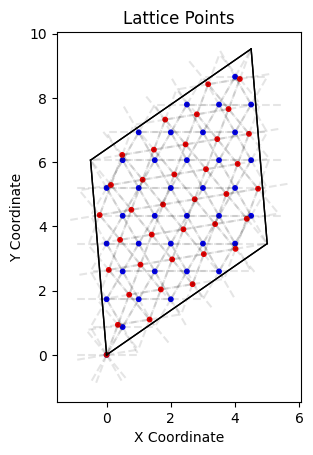

In [8]:
#Let's plot the lattice
lattice.plot_lattice()

#### Let's make the Hamiltonian

In [64]:
## make the hamiltonian (tuu, tdd, tud, tdu, tdd, mu1, mu2)
ham = lattice.generate_hamiltonian(1, 1.2, 0.1, 0.1, 0, 0.01)
## Here, 1 (1.2) is hopping amplitude in upper (lower) layer, 0.1 is interlayer hopping amplitude, and 0 (0.01) is the onsite energy in upper (lower) layer.
                             ### Hurrah! We have made the hamiltonian. ####

[[0.01 1.2  0.   ... 0.   0.   0.  ]
 [1.2  0.01 1.2  ... 0.   0.   0.  ]
 [0.   1.2  0.01 ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.01 1.2  0.  ]
 [0.   0.   0.   ... 1.2  0.01 1.2 ]
 [0.   0.   0.   ... 0.   1.2  0.01]]


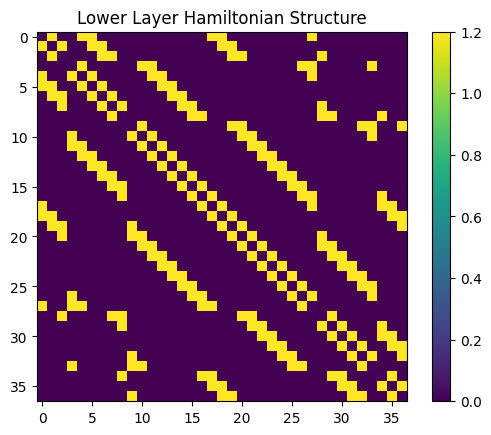

In [67]:
## Suppose we want to extract the lower layer's hamiltonian only----
N = ham.shape[0]
lower_layer_ham = ham[:N//2, :N//2]
print(lower_layer_ham) 
## Let's plot the structure r connections of the lower layer----
plt.imshow(lower_layer_ham)
plt.title("Lower Layer Hamiltonian Structure")
plt.colorbar()
## we can graphically see the connections in the lower layer.

In [69]:
## Similarly, we can extract the upper layer's hamiltonian----
#upper_layer_ham = ham[N//2:, N//2:]
# plt.imshow(upper_layer_ham)
# plt.title("Upper Layer Hamiltonian Structure")
# plt.colorbar()
#print(upper_layer_ham)

In [38]:
## The interlayer hamiltonian can be extracted as follows----
# interlayer_ham = ham[:N//2, N//2:]
# plt.imshow(interlayer_ham)
# plt.title("Interlayer Hamiltonian Structure")
# plt.colorbar()

##### Study of eigenvalues and eigenvectors

In [39]:
## find the eigenvalues and eigenvectors of the hamiltonian----
eigenvalues, eigenvectors = np.linalg.eig(ham)
j = eigenvalues.real.argsort() # Sort the eigenvalues based on their real parts
eigenvalues = eigenvalues[j] 
eigenvectors = eigenvectors[:, j] # Sort the eigenvectors accordingly
## Let's plot the eigenvalues

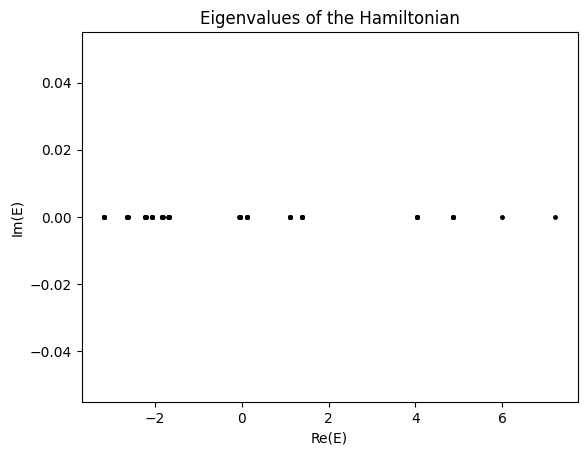

In [42]:
plt.plot(eigenvalues.real, eigenvalues.imag, 'k.', markersize=5)
plt.xlabel('Re(E)') 
plt.ylabel('Im(E)')
## All the eigenvalues will be real, which is expected for a Hermitian Hamiltonian.
plt.title('Eigenvalues of the Hamiltonian')
plt.show()

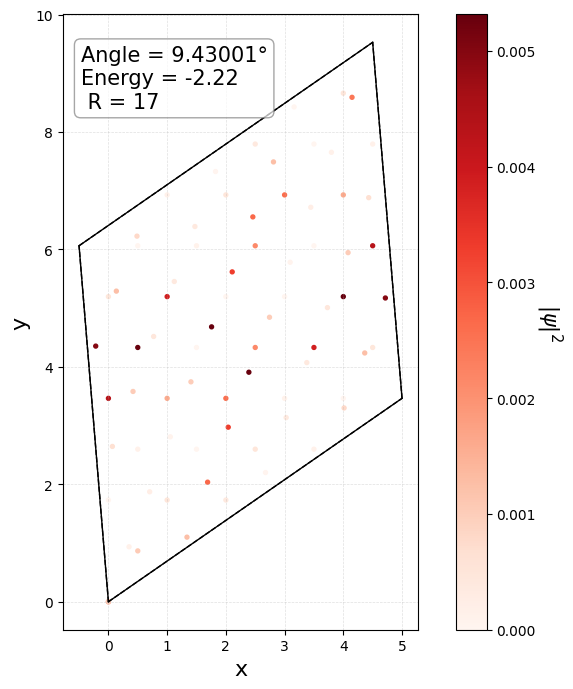

In [61]:
## Lets plot the |eigenvectors|^2 (probability of a given state) of the Hamiltonian for a specific eigenvalue----
N = lattice.lower_lattice.points.shape[0] # Number of points in the lower layer
R =  np.random.randint(0, 2*N) # Randomly select an energy state of the system
theta = np.round(lattice.theta * 180 / np.pi, 5) # Convert angle to degrees (rounded to 5 decimal places)

plt.figure(figsize=(8, 7))
nx = lattice.nx
ny = lattice.ny
mlv1 = lattice.mlv1
mlv2 = lattice.mlv2

# Draw large unit cell
plt.plot([0, nx*mlv1[0]], [0, nx*mlv1[1]], 'k', linewidth=1)
plt.plot([0, ny*mlv2[0]], [0, ny*mlv2[1]], 'k', linewidth=1)
plt.plot([nx*mlv1[0], nx*mlv1[0] + ny*mlv2[0]], 
         [nx*mlv1[1], nx*mlv1[1] + ny*mlv2[1]], 'k', linewidth=1)
plt.plot([ny*mlv2[0], nx*mlv1[0] + ny*mlv2[0]], 
         [ny*mlv2[1], nx*mlv1[1] + ny*mlv2[1]], 'k', linewidth=1)

# Draw base unit cell
plt.plot([0, mlv1[0]], [0, mlv1[1]], 'k--', linewidth=1)
plt.plot([0, mlv2[0]], [0, mlv2[1]], 'k--', linewidth=1)
plt.plot([mlv1[0], mlv1[0] + mlv2[0]], 
         [mlv1[1], mlv1[1] + mlv2[1]], 'k--', linewidth=1)
plt.plot([mlv2[0], mlv1[0] + mlv2[0]], 
         [mlv2[1], mlv1[1] + mlv2[1]], 'k--', linewidth=1)

# Plot upper and lower lattice points
sc1 = plt.scatter(lattice.upper_lattice.points[:, 0], 
                  lattice.upper_lattice.points[:, 1],
                  c=np.abs(eigenvectors[:N, R])**2, cmap='Reds', s=8, label='Upper')
sc2 = plt.scatter(lattice.lower_lattice.points[:, 0], 
                  lattice.lower_lattice.points[:, 1],
                  c=np.abs(eigenvectors[N:, R])**2, cmap='Reds', s=8, label='Lower')

plt.gca().set_aspect('equal', adjustable='box')

# Colorbar
cbar = plt.colorbar(sc2)
cbar.set_label(r'$|\psi|^2$', rotation=270, labelpad=20, fontsize=15)

# Axis labels
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)

# Annotation with energy and angle
plt.text(0.05, 0.95,
         f'Angle = {theta}°\nEnergy = {eigenvalues[R].real:.2f}\n R = {R}',
         transform=plt.gca().transAxes,
         fontsize=15, va='top',
         bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round', alpha=0.7))

# Clean grid and layout
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.4)
plt.tight_layout()

plt.show()


#### Suppose we want to design the hopping amplitudes as per our choice (not constant, as discussed earlier) then using **MoirePy**, we can define that very easily.

In [ ]:
## Define the hopping function for the lower layer as a function of distance between two points
def tdd(this_coo, neigh_coo, this_type, neigh_type):  
#(coordinates of this point, coordinates of neighbor point, type of this point (for example, Graphene lattice has A and B type atoms), type of neighbor point)
    return np.linalg.norm(this_coo - neigh_coo)
## Define the hopping function for the upper layer as a function of distance between two points
def tuu(this_coo, neigh_coo, this_type, neigh_type):
    return np.linalg.norm(this_coo - neigh_coo) * 2
## Define the interlayer hopping function as a function of distance between two points
def tud(this_coo, neigh_coo, this_type, neigh_type):
    return np.exp(-np.linalg.norm(this_coo - neigh_coo) / 2)
## Define the onsite energy function for the upper layer
def mu1(this_coo, this_type):
    return 0
## Define the onsite energy function for the lower layer
def mu2(this_coo, this_type):
    return 0

In [78]:
## Lets now generate the hamiltonian using the custom hopping functions defined above
ham_custom = lattice.generate_hamiltonian(tuu, tdd, tud, tud, mu1, mu2)

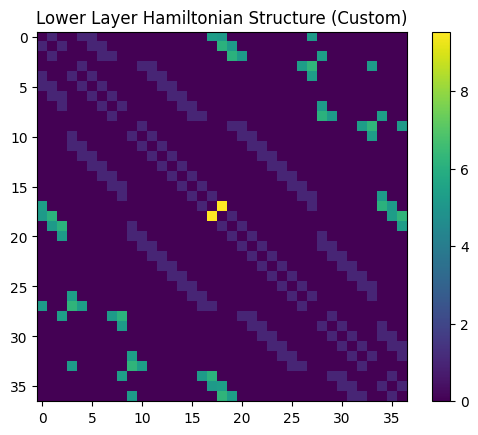

In [ ]:
## Extract the lower layer's hamiltonian from the custom hamiltonian
lower_layer_ham_custom = ham_custom[:N//2, :N//2]
## Let's plot the structure connections of the lower layer from the custom hamiltonian
plt.imshow(lower_layer_ham_custom)
plt.title("Lower Layer Hamiltonian Structure (Custom)")
plt.colorbar()
plt.show()
### Similarly, we can check the others and do the similar analysis!!

#### Let's now analyze the case of multiple orbitals per site case (for simplicity choose, k = 2) using **MoirePy**.

In [84]:
## Define the lattice function 
# (Lattice type, a(ll1), b(ll2), m(ul1), n(ul2), x_no, y_no, translation of upper layer by an vector, pbc criteria, no. of orbitals(k))---  
lattice_n_orbitals = BilayerMoireLattice(TriangularLayer, 3, 4, 4, 3, 1, 1, (0, 0), True, 2) 
## Define the hamiltonian with 2 orbitals
ham_n_orbitals = lattice_n_orbitals.generate_hamiltonian(1, 1.2, 0.1, 0.1, 0, 0.01)

twist angle = 0.1646 rad (9.4300 deg)
37 points in lower lattice
37 points in upper lattice


In [87]:
ham_n_orbitals.shape ## degrees of freedom gets doubled due to the two orbitals in the system

(148, 148)

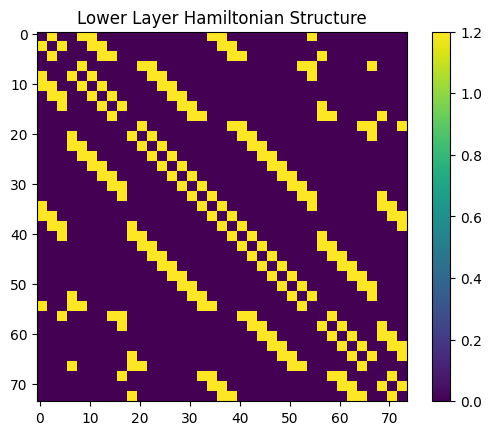

In [90]:
## Extract the lower layer's hamiltonian from the custom hamiltonian
lower_layer_ham_custom = ham_n_orbitals[:N, :N]
## Let's plot the structure connections of the lower layer from the custom hamiltonian
plt.imshow(lower_layer_ham_custom)
plt.title("Lower Layer Hamiltonian Structure")
plt.colorbar()
plt.show()
### Similarly, we can check the others and do the similar analysis!!

Since, we are at pbc = True condition, so because of the translation symmtery in the system, we can analyze it in k-space (momentum space), and this can be found in k_space_ham.ipynb file.

## References

1. Neil Ashcroft, and David Mermin, Solid State Physics, Saunders College Publishing, 1976.

2. H. Bruus and K. Flensberg, Many-Body Quantum Theory in Condensed Matter Physics: An Introduction, OUP Oxford, 2004.